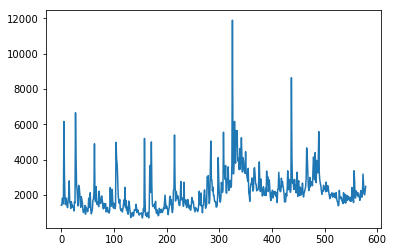

In [18]:
import pandas
import matplotlib.pyplot as plt
dataset = pandas.read_csv('C://Users//Think//Documents//pageviews for 579 days.csv')
plt.plot(dataset)
plt.show()

In [19]:
# LSTM DEMO
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [20]:
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [21]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [22]:
train_size = int(len(dataset) * 0.8)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [23]:
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))

In [24]:
model = Sequential()
model.add(LSTM(128, input_shape=(trainX.shape[1], trainX.shape[2])))
model.add(Dense(1))

In [25]:
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [26]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.8)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(128, input_shape=(trainX.shape[1], trainX.shape[2])))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, nb_epoch=100, batch_size=1, verbose=2)
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

C:\Users\Think\Anaconda3\lib\site-packages\keras\models.py:844: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/100
7s - loss: 0.0080
Epoch 2/100
3s - loss: 0.0075
Epoch 3/100
3s - loss: 0.0070
Epoch 4/100
3s - loss: 0.0070
Epoch 5/100
4s - loss: 0.0070
Epoch 6/100
4s - loss: 0.0068
Epoch 7/100
4s - loss: 0.0069
Epoch 8/100
4s - loss: 0.0070
Epoch 9/100
4s - loss: 0.0069
Epoch 10/100
3s - loss: 0.0069
Epoch 11/100
3s - loss: 0.0070
Epoch 12/100
3s - loss: 0.0067
Epoch 13/100
3s - loss: 0.0067
Epoch 14/100
3s - loss: 0.0068
Epoch 15/100
3s - loss: 0.0069
Epoch 16/100
3s - loss: 0.0067
Epoch 17/100
3s - loss: 0.0067
Epoch 18/100
3s - loss: 0.0067
Epoch 19/100
3s - loss: 0.0065
Epoch 20/100
3s - loss: 0.0067
Epoch 21/100
3s - loss: 0.0067
Epoch 22/100
3s - loss: 0.0066
Epoch 23/100
3s - loss: 0.0067
Epoch 24/100
3s - loss: 0.0066
Epoch 25/100
3s - loss: 0.0066
Epoch 26/100
3s - loss: 0.0067
Epoch 27/100
3s - loss: 0.0065
Epoch 28/100
3s - loss: 0.0065
Epoch 29/100
3s - loss: 0.0065
Epoch 30/100
3s - loss: 0.0066
Epoch 31/100
3s - loss: 0.0065
Epoch 32/100
3s - loss: 0.0065
Epoch 33/100
4s -

In [27]:
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 0.08 RMSE
Test Score: 0.05 RMSE


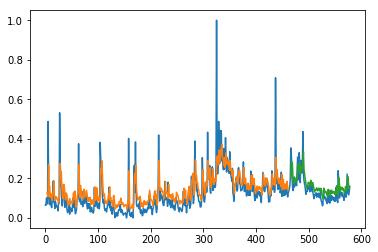

In [28]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()